# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane drug regimens had the most observed timepoints. These two treatments also had a lower average tumer volumes at the last recorded timepoint (40 mm3) compared to the other treatment regimens (50 mm3). Due to the higher success rate, the Capomulin and Ramicane treatments may have been chosen more frequently.
- There was one outlier in the Ifubinol region, Mouse c326 had a final tumer volume of 36.32. This mouse only made it to a timepoint of 5 minutes, perhaps this treatment has more volatile effects.
 - The correlation coefficient between mouse weight and average tumor volume in the Capomulin treatment regimen is 0.84. This implies that there is a strong correlation between these two variables and this could be something to further look into.
 - The proportion of male to female mice was relatively even (51% male to 49% female mice), so it is unlikely that the gender skewed the results in any dramatic fashion.

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_results = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [59]:
# Checking the number of mice.
len(mouse_study_results["Mouse ID"].unique())

249

In [60]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_row_series = mouse_study_results.duplicated(["Mouse ID", "Timepoint"], keep=False)

duplicate_mice = mouse_study_results.loc[duplicate_row_series, "Mouse ID"].unique()

In [61]:
# Optional: Get all the data for the duplicate mouse ID. 

all_duplicate_mouse_series = mouse_study_results["Mouse ID"].isin(duplicate_mice)
mouse_study_results[all_duplicate_mouse_series]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_results[~all_duplicate_mouse_series]

In [63]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [91]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean Tumor Volume": regimen_mean, "Median Tumor Volume": regimen_median, "Tumor Volume Variance": regimen_variance, 
                          "Tumor Volume Std. Dev.": regimen_std, "Tumor Volume Std. Error": regimen_sem})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [65]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

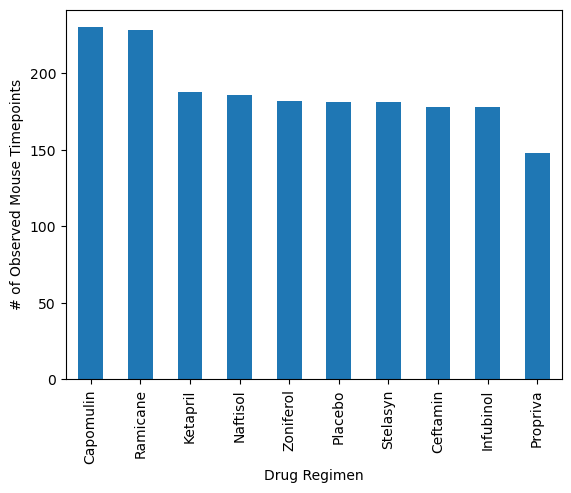

In [66]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

rows = clean_df.groupby("Drug Regimen")["Drug Regimen"].count().sort_values(ascending=False)

rows.plot(kind = "bar")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

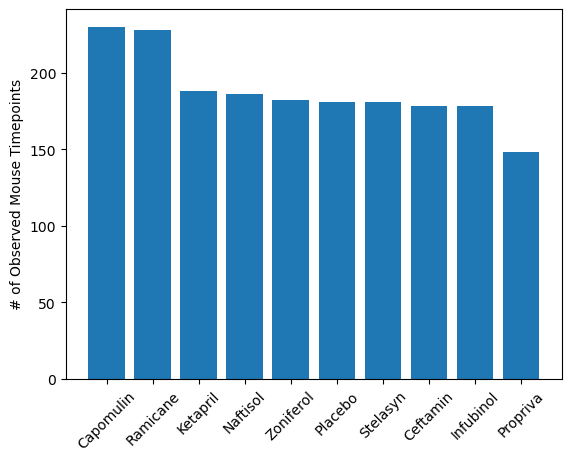

In [67]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(rows))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, rows)
plt.xticks(tick_locations, rows.index.values, rotation = 45)
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

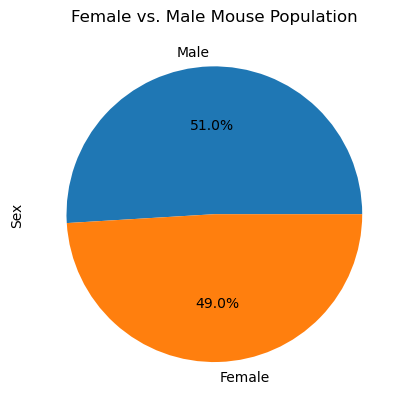

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_count = clean_df["Sex"].value_counts()

gender_count.plot(kind = "pie", autopct='%1.1f%%')

plt.title("Female vs. Male Mouse Population")
plt.show()

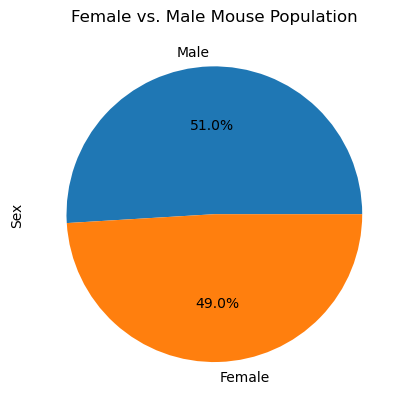

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = clean_df["Sex"].value_counts()

plt.pie(gender_count.values, labels = gender_count.index, autopct='%1.1f%%')

plt.title("Female vs. Male Mouse Population")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [92]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

regimen_df = clean_df.loc[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = regimen_df.groupby("Mouse ID")["Timepoint"].max()
last_timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = pd.merge(last_timepoint_df, clean_df, how="left", on= ["Mouse ID", "Timepoint"])
merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [93]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    treatment_data = merge_df.loc[merge_df["Drug Regimen"] == treatment,'Tumor Volume (mm3)']
    
    quartiles = treatment_data.quantile([.25, .5, .75])
    lower_q = round(quartiles[0.25], 2)
    upper_q = round(quartiles[0.75], 2)
    iqr = round(upper_q - lower_q, 2)

    lower_bound = round(lower_q - (1.5 * iqr), 2)
    upper_bound = round(upper_q + (1.5 * iqr), 2)
    
    # print(f"Values below {lower_bound} could be outliers.")
    # print(f"Values above {upper_bound} could be outliers.")    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data.append(treatment_data)
    
    # add subset 
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")
    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [89]:
Infubinol_df = merge_df.loc[merge_df["Drug Regimen"] == "Infubinol"]

Infubinol_df.sort_values("Tumor Volume (mm3)",  ascending=False)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
14,c139,45,Infubinol,Male,11,28,72.226731,2
0,a203,45,Infubinol,Female,20,23,67.973419,2
93,y163,45,Infubinol,Female,17,27,67.685569,3
31,i386,40,Infubinol,Female,23,29,67.289621,4
41,k483,45,Infubinol,Female,20,30,66.196912,3
8,a685,45,Infubinol,Male,8,30,66.083066,3
1,a251,45,Infubinol,Female,21,25,65.525743,1
99,z581,45,Infubinol,Female,24,25,62.754451,3
20,e476,45,Infubinol,Male,23,26,62.435404,1
42,k804,35,Infubinol,Female,23,29,62.117279,2


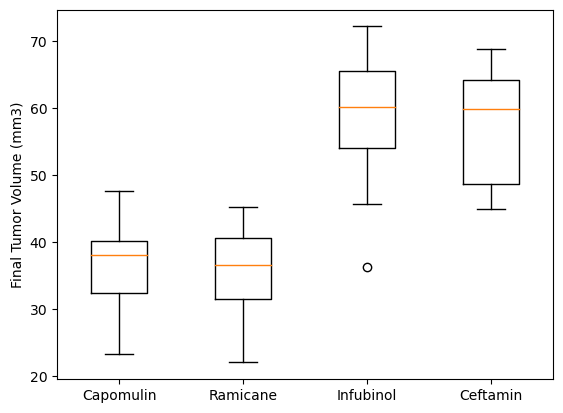

In [72]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()

ax.boxplot(tumor_vol_data, labels=treatments)

ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

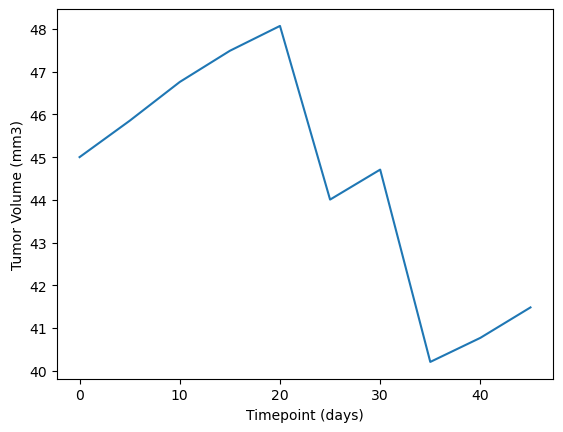

In [73]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse = clean_df.loc[clean_df["Mouse ID"] == "l509"]

plt.plot(single_mouse["Timepoint"], single_mouse["Tumor Volume (mm3)"])

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

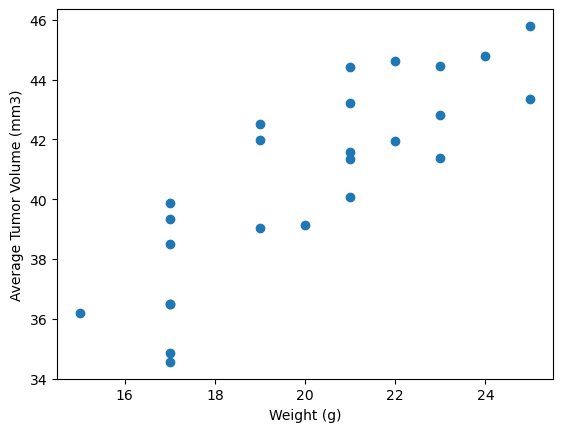

In [74]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
Capomulin_avg = Capomulin_df.groupby(["Mouse ID"])[["Weight (g)", "Tumor Volume (mm3)"]].mean()

x_axis = Capomulin_avg["Weight (g)"]
y_axis = Capomulin_avg["Tumor Volume (mm3)"]

plt.scatter(x_axis, y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


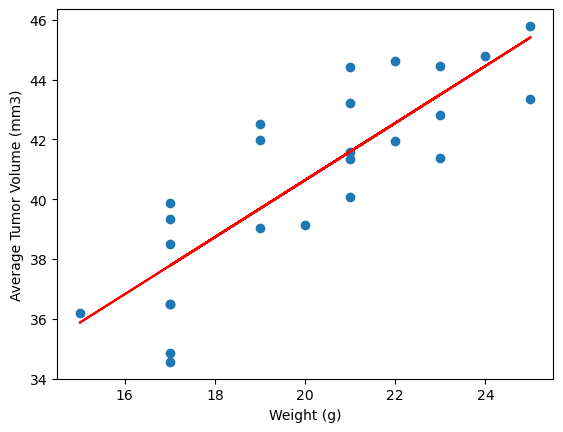

In [79]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_axis,y_axis)

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

print(f"The correlation between mouse weight and the average tumor volume is: {round(correlation[0],2)}")
plt.show()